# Finding Learning Rate
---
Experiments in finding the learning rate using fastai library
___

## Import Library

In [1]:
%matplotlib inline

In [2]:
from fastai.vision import *

## Load Data

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/models')]

In [5]:
! cat {path}/labels.txt

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [6]:
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=get_transforms(), size=32).normalize(imagenet_stats)

## EDA

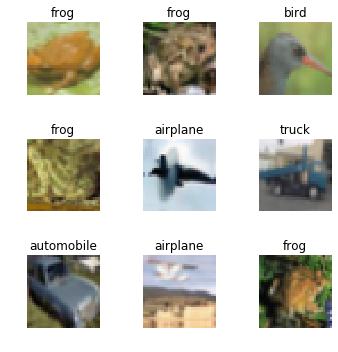

In [7]:
data.show_batch(3, figsize=(5,5))

In [8]:
data.c, data.classes

(10,
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [9]:
data.batch_size, data.stats

(64, ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]))

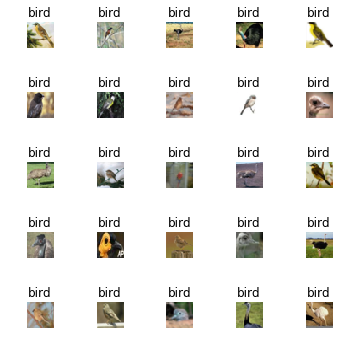

In [10]:
data.show_batch(rows=5, figsize=(5,5), ds_type=DatasetType.Valid)

# EXPERIMENTS: Trying out different ways to pick learning rates
---

## EXP#1: Training from Scratch

In [11]:
learner = create_cnn(data=data, arch=models.resnet34, pretrained=False, metrics=[accuracy])

In [33]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-06


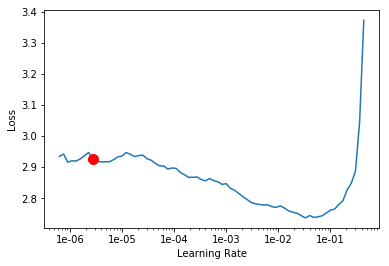

In [34]:
learner.recorder.plot()

## Exp#1.A: Picking learning rates at the start, middle and end of the steepest curve

In [35]:
lrs = [2e-2, 2e-3, 2e-5]

### End of Steepest Curve

In [36]:
learner.fit_one_cycle(5, lrs[0])

epoch,train_loss,valid_loss,accuracy
1,1.765024,2.417485,0.330800
2,1.591551,1.742030,0.457800
3,1.225375,3.013402,0.550900
4,0.975787,1.244909,0.696500
5,0.862435,0.980219,0.718900


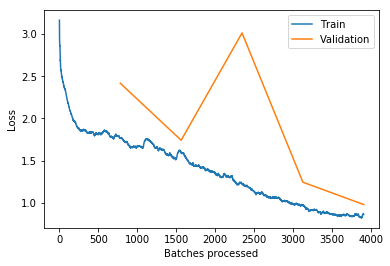

In [37]:
learner.recorder.plot_losses()

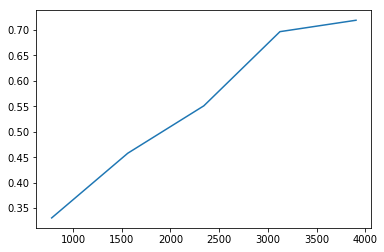

In [38]:
learner.recorder.plot_metrics()

In [39]:
learner.save('rn34_train-scratch_lr-end')

In [42]:
end_scratch_losses = learner.recorder.losses
end_scratch_val_losses = learner.recorder.val_losses
end_scratch_accuracy = learner.recorder.metrics

In [54]:
np.savez(path/"end_scratch_log.npz",
         end_scratch_losses = end_scratch_losses,
         end_scratch_val_losses = end_scratch_val_losses,
         end_scratch_accuracy = end_scratch_accuracy)

### Middle of Steepest Curve

In [55]:
learner = create_cnn(data=data, arch=models.resnet34, pretrained=False, metrics=[accuracy])

In [56]:
learner.fit_one_cycle(5, lrs[1])

epoch,train_loss,valid_loss,accuracy
1,1.685451,1.625809,0.423600
2,1.348780,1.348433,0.533800
3,1.073169,0.999279,0.651100
4,0.845773,0.751166,0.736100
5,0.739851,0.698422,0.756400


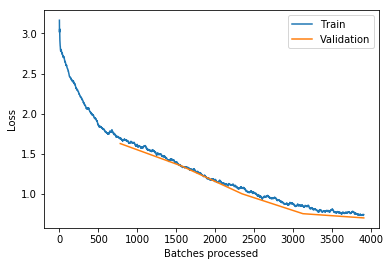

In [57]:
learner.recorder.plot_losses()

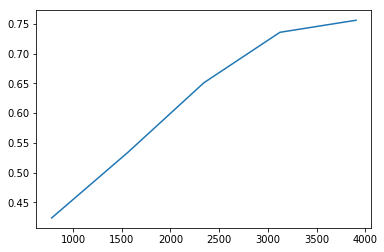

In [58]:
learner.recorder.plot_metrics()

In [59]:
learner.save('rn34_train-scratch_lr-mid')

In [60]:
mid_scratch_losses = learner.recorder.losses
mid_scratch_val_losses = learner.recorder.val_losses
mid_scratch_accuracy = learner.recorder.metrics

In [61]:
np.savez(path/"mid_scratch_log.npz",
         mid_scratch_losses = mid_scratch_losses,
         mid_scratch_val_losses = mid_scratch_val_losses,
         mid_scratch_accuracy = mid_scratch_accuracy)

### Start of Steepest Curve

In [62]:
learner = create_cnn(data=data, arch=models.resnet34, pretrained=False, metrics=[accuracy])

In [63]:
learner.fit_one_cycle(5, lrs[2])

epoch,train_loss,valid_loss,accuracy
1,2.567606,2.210682,0.217300
2,2.174835,1.912812,0.315500
3,2.040041,1.768711,0.364100
4,1.959649,1.698757,0.392200
5,1.929178,1.682775,0.397700


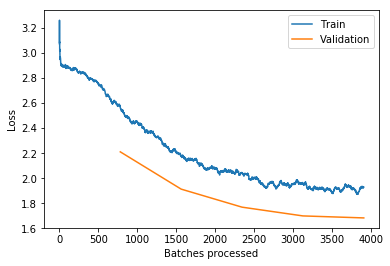

In [64]:
learner.recorder.plot_losses()

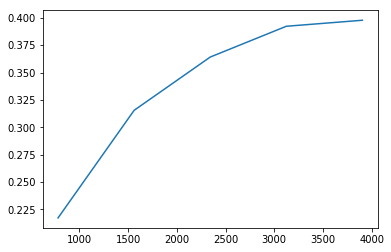

In [65]:
learner.recorder.plot_metrics()

In [66]:
learner.save('rn34_train-scratch_lr-start')

In [67]:
start_scratch_losses = learner.recorder.losses
start_scratch_val_losses = learner.recorder.val_losses
start_scratch_accuracy = learner.recorder.metrics

In [69]:
np.savez(path/"start_scratch_log.npz",
         start_scratch_losses = start_scratch_losses,
         start_scratch_val_losses = start_scratch_val_losses,
         start_scratch_accuracy = start_scratch_accuracy)

In [71]:
scratch_iters = list(range(len(learner.recorder.losses)))
scratch_val_iters = np.cumsum(learner.recorder.nb_batches)

In [72]:
np.savez(path/"scratch_log.npz",
         scratch_iters=scratch_iters,
         scratch_val_iters=scratch_val_iters)

___

## EXP#2: Finetuning last layer

In [97]:
learner = create_cnn(data=data, arch=models.resnet34, metrics=[accuracy])

In [100]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07


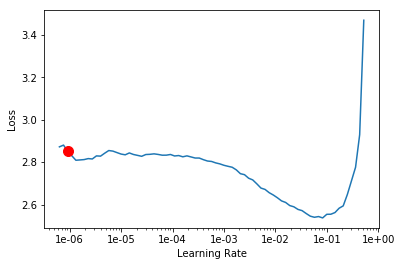

In [101]:
learner.recorder.plot()

## Exp#2.A: Picking learning rates at the start, middle and end of the steepest curve

In [102]:
lrs = [5e-2, 1e-2, 1e-3]

### End of Steepest Curve

In [103]:
learner.fit_one_cycle(5, lrs[0])

epoch,train_loss,valid_loss,accuracy
1,1.420601,1.681851,0.550300
2,1.493763,4.147227,0.491400
3,1.247964,1.617429,0.627400
4,1.015186,2.428699,0.694700
5,0.903348,0.880419,0.702600


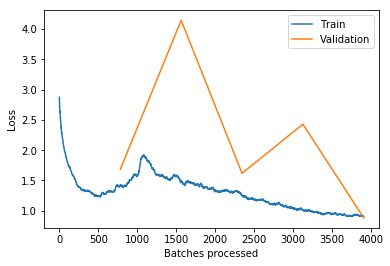

In [104]:
learner.recorder.plot_losses()

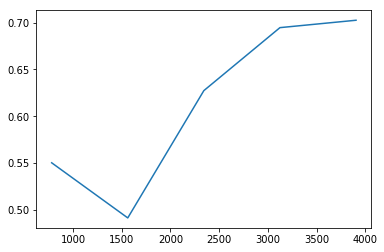

In [105]:
learner.recorder.plot_metrics()

In [106]:
learner.save('rn34_finetune_lr-end')

In [107]:
end_finetune_losses = learner.recorder.losses
end_finetune_val_losses = learner.recorder.val_losses
end_finetune_accuracy = learner.recorder.metrics

In [108]:
np.savez(path/"end_finetune_log.npz",
         end_finetune_losses = end_finetune_losses,
         end_finetune_val_losses = end_finetune_val_losses,
         end_finetune_accuracy = end_finetune_accuracy)

### Middle of Steepest Curve

In [109]:
learner = create_cnn(data=data, arch=models.resnet34, metrics=[accuracy])

In [110]:
learner.fit_one_cycle(5, lrs[1])

epoch,train_loss,valid_loss,accuracy
1,1.167224,1.023118,0.643600
2,0.999218,0.944779,0.673300
3,0.925627,0.812381,0.718200
4,0.788296,0.683182,0.760000
5,0.738930,0.672409,0.763600


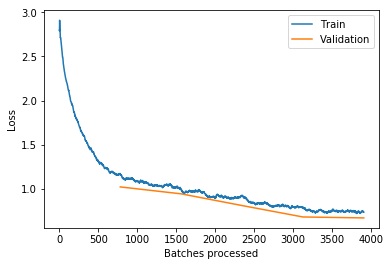

In [111]:
learner.recorder.plot_losses()

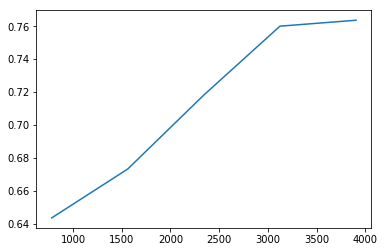

In [112]:
learner.recorder.plot_metrics()

In [113]:
learner.save('rn34_finetune_lr-mid')

In [114]:
mid_finetune_losses = learner.recorder.losses
mid_finetune_val_losses = learner.recorder.val_losses
mid_finetune_accuracy = learner.recorder.metrics

In [115]:
np.savez(path/"mid_finetune_log.npz",
         mid_finetune_losses = mid_finetune_losses,
         mid_finetune_val_losses = mid_finetune_val_losses,
         mid_finetune_accuracy = mid_finetune_accuracy)

### Start of Steepest Curve

In [116]:
learner = create_cnn(data=data, arch=models.resnet34, metrics=[accuracy])

In [117]:
learner.fit_one_cycle(5, lrs[2])

epoch,train_loss,valid_loss,accuracy
1,1.508633,1.309826,0.536200
2,1.069754,0.945304,0.668500
3,0.933023,0.838243,0.709300
4,0.879240,0.771681,0.727300
5,0.844411,0.768448,0.728300


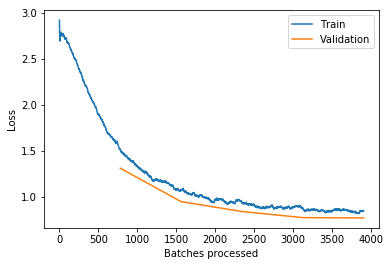

In [118]:
learner.recorder.plot_losses()

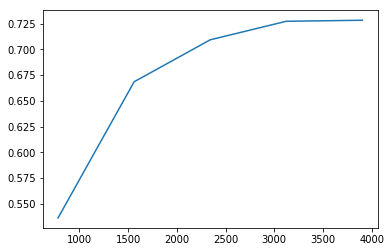

In [119]:
learner.recorder.plot_metrics()

In [120]:
learner.save('rn34_finetune_lr-start')

In [121]:
start_finetune_losses = learner.recorder.losses
start_finetune_val_losses = learner.recorder.val_losses
start_finetune_accuracy = learner.recorder.metrics

In [122]:
np.savez(path/"end_finetune_log.npz",
         start_finetune_losses = start_finetune_losses,
         start_finetune_val_losses = start_finetune_val_losses,
         start_finetune_accuracy = start_finetune_accuracy)

In [123]:
finetune_iters = list(range(len(learner.recorder.losses)))
finetune_val_iters = np.cumsum(learner.recorder.nb_batches)

In [124]:
np.savez(path/"finetune_log.npz", finetune_iters=finetune_iters, finetune_val_iters=finetune_val_iters)

___

## EXP#3: Transfer Learning

**Here, we will load a finetuned model which was trained at the last layer only and apply differential learning rates to train it again**

In [125]:
learner = create_cnn(data=data, arch=models.resnet34, metrics=[accuracy])
learner.load('rn34_finetune_lr-mid')
learner.unfreeze()

In [126]:
lr_find(learner)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


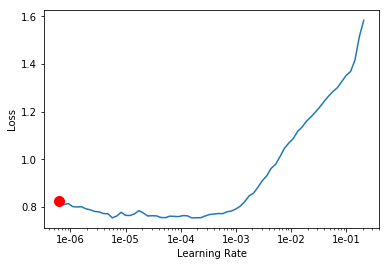

In [127]:
learner.recorder.plot()

**Here, we find that the loss vs learning rate curve is very different from the earlier tasks. So, we choose values before the point where the loss started to increase rapidly.**

## Exp#2.A: Picking learning rates at the start, middle and end of the curve before the loss shot upwards

In [128]:
new_lrs = [1e-4, 1e-5, 1e-6]
# We are told to use the one-tenth of the lr used for finetuning
old_lr = lrs[1]/10

### End of Steepest Curve

In [130]:
learner.fit_one_cycle(5, slice(new_lrs[0], old_lr))

epoch,train_loss,valid_loss,accuracy
1,0.772809,0.711785,0.748200
2,0.666577,0.614075,0.790000
3,0.610381,0.551932,0.809300
4,0.500025,0.473650,0.835500
5,0.428772,0.461556,0.840800


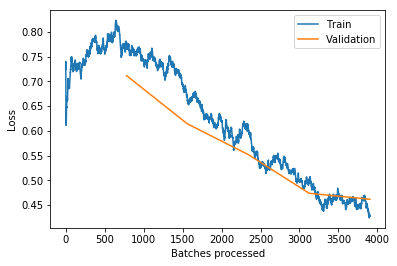

In [131]:
learner.recorder.plot_losses()

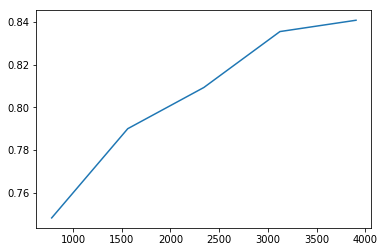

In [132]:
learner.recorder.plot_metrics()

In [133]:
learner.save('rn34_transfer_lr-end')

In [134]:
end_transfer_losses = learner.recorder.losses
end_transfer_val_losses = learner.recorder.val_losses
end_transfer_accuracy = learner.recorder.metrics

In [135]:
np.savez(path/"end_transfer_log.npz",
         end_transfer_losses = end_transfer_losses,
         end_transfer_val_losses = end_transfer_val_losses,
         end_transfer_accuracy = end_transfer_accuracy)

### Middle of Steepest Curve

In [136]:
learner = create_cnn(data=data, arch=models.resnet34, metrics=[accuracy])

In [137]:
learner.fit_one_cycle(5, slice(new_lrs[1], old_lr))

epoch,train_loss,valid_loss,accuracy
1,1.795883,1.589711,0.447100
2,1.524576,1.373669,0.513700
3,1.389125,1.284091,0.548500
4,1.342055,1.237800,0.562700
5,1.326715,1.221739,0.568300


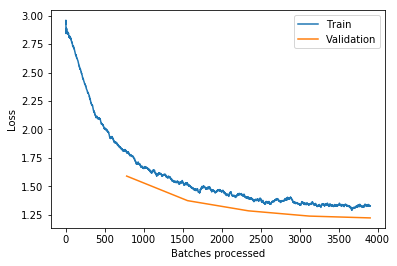

In [138]:
learner.recorder.plot_losses()

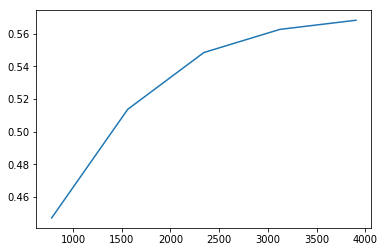

In [139]:
learner.recorder.plot_metrics()

In [140]:
learner.save('rn34_transfer_lr-mid')

In [141]:
mid_transfer_losses = learner.recorder.losses
mid_transfer_val_losses = learner.recorder.val_losses
mid_transfer_accuracy = learner.recorder.metrics

In [142]:
np.savez(path/"mid_transfer_log.npz",
         mid_transfer_losses = mid_transfer_losses,
         mid_transfer_val_losses = mid_transfer_val_losses,
         mid_transfer_accuracy = mid_transfer_accuracy)

### Start of Steepest Curve

In [143]:
learner = create_cnn(data=data, arch=models.resnet34, metrics=[accuracy])

In [144]:
learner.fit_one_cycle(5, slice(new_lrs[2], old_lr))

epoch,train_loss,valid_loss,accuracy
1,1.809091,1.594278,0.451500
2,1.620954,1.467548,0.488600
3,1.508749,1.408193,0.507000
4,1.467144,1.361995,0.521000
5,1.473650,1.354484,0.525400


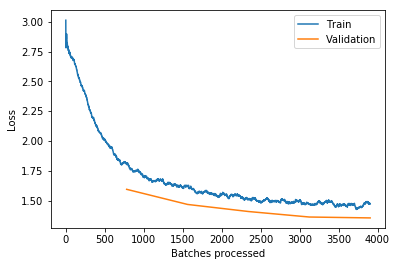

In [145]:
learner.recorder.plot_losses()

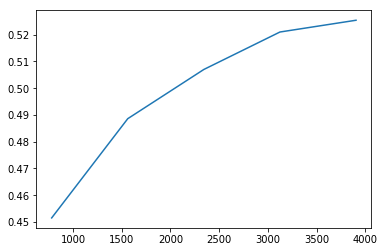

In [146]:
learner.recorder.plot_metrics()

In [147]:
learner.save('rn34_transfer_lr-start')

In [148]:
start_transfer_losses = learner.recorder.losses
start_transfer_val_losses = learner.recorder.val_losses
start_transfer_accuracy = learner.recorder.metrics

In [149]:
np.savez(path/"start_transfer_log.npz",
         start_transfer_losses = start_transfer_losses,
         start_transfer_val_losses = start_transfer_val_losses,
         start_transfer_accuracy = start_transfer_accuracy)

In [150]:
transfer_iters = list(range(len(learner.recorder.losses)))
transfer_val_iters = np.cumsum(learner.recorder.nb_batches)

In [151]:
np.savez(path/"transfer_log.npz", transfer_iters=transfer_iters, transfer_val_iters=transfer_val_iters)

___

# RESULTS: How to find a learning rate?
---

## For Training from Scratch

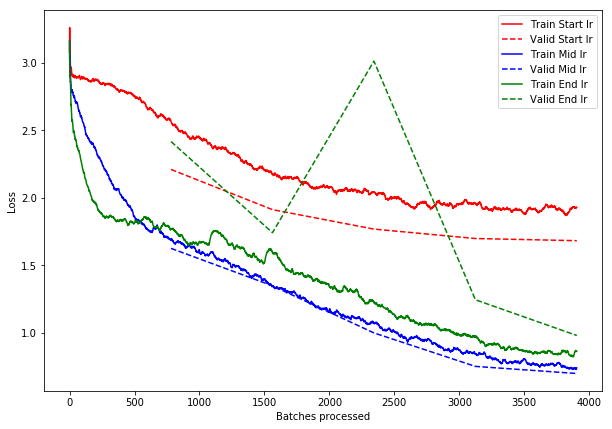

In [164]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(scratch_iters, start_scratch_losses, label='Train Start lr', color='r')
ax.plot(scratch_val_iters, start_scratch_val_losses, label='Valid Start lr', color='r',linestyle='--')

ax.plot(scratch_iters, mid_scratch_losses, label='Train Mid lr', color='b')
ax.plot(scratch_val_iters, mid_scratch_val_losses, label='Valid Mid lr', color='b',linestyle='--')

ax.plot(scratch_iters, end_scratch_losses, label='Train End lr', color='g')
ax.plot(scratch_val_iters, end_scratch_val_losses, label='Valid End lr', color='g',linestyle='--')

ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

___

## For Finetuning last layer

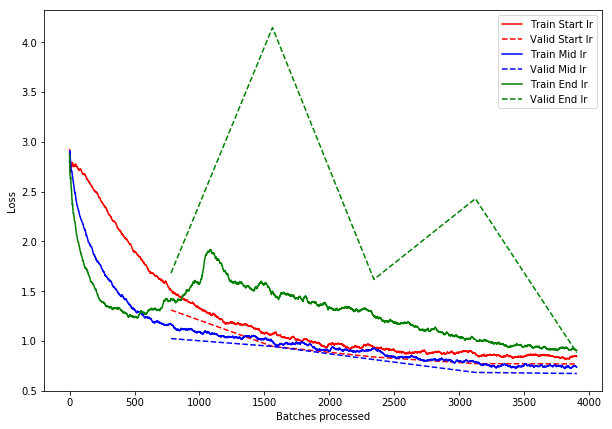

In [165]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(finetune_iters, start_finetune_losses, label='Train Start lr', color='r')
ax.plot(finetune_val_iters, start_finetune_val_losses, label='Valid Start lr', color='r',linestyle='--')

ax.plot(finetune_iters, mid_finetune_losses, label='Train Mid lr', color='b')
ax.plot(finetune_val_iters, mid_finetune_val_losses, label='Valid Mid lr', color='b',linestyle='--')

ax.plot(finetune_iters, end_finetune_losses, label='Train End lr', color='g')
ax.plot(finetune_val_iters, end_finetune_val_losses, label='Valid End lr', color='g',linestyle='--')

ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

___

## For Transfer Learning

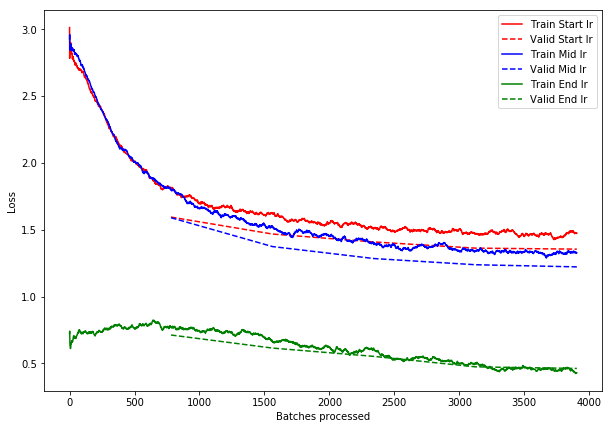

In [166]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(transfer_iters, start_transfer_losses, label='Train Start lr', color='r')
ax.plot(transfer_val_iters, start_transfer_val_losses, label='Valid Start lr', color='r',linestyle='--')

ax.plot(transfer_iters, mid_transfer_losses, label='Train Mid lr', color='b')
ax.plot(transfer_val_iters, mid_transfer_val_losses, label='Valid Mid lr', color='b',linestyle='--')

ax.plot(transfer_iters, end_transfer_losses, label='Train End lr', color='g')
ax.plot(transfer_val_iters, end_transfer_val_losses, label='Valid End lr', color='g',linestyle='--')

ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

___